In [1]:
import data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from fcann2 import fcann2_train, fcann2_classify, fcann2_classify_new
from tf_logreg import TFLogreg
from tf_deep import TFDeep
from ksvm_wrap import KSVMWrap

#### 1. Zadatak - Višeslojna klasifikacija u Pythonu

iteration 0: loss 0.6931537255324407
iteration 10000: loss 0.2885476441938532
iteration 20000: loss 0.2625850051250917
iteration 30000: loss 0.260855974269366
iteration 40000: loss 0.2602957701113211
iteration 50000: loss 0.25992712820174557
iteration 60000: loss 0.2596344992383842
iteration 70000: loss 0.2594271488777881
iteration 80000: loss 0.25925145793187154
iteration 90000: loss 0.25912553526141613


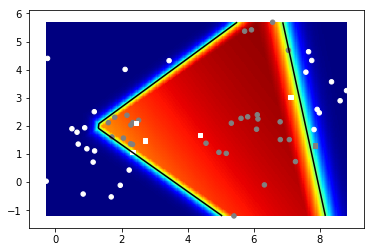

In [2]:
np.random.seed(100)
X, Y_ = data.sample_gmm(6, 2, 10)
W1, b1, W2, b2 = fcann2_train(X, Y_, print_step=10000)
decfunc = fcann2_classify_new(W1, b1, W2, b2)

Y = np.argmax(fcann2_classify(X, W1, b1, W2, b2), axis=1)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfunc, bbox, offset=0.5)
data.graph_data(X, Y_, Y)

plt.show()


#### 2. Zadatak - Linearna regresija u Tensorflowu

In [3]:
# 1. definicija računskog grafa
# podatci i parametri
X = tf.placeholder(tf.float32, [None])
Y_ = tf.placeholder(tf.float32, [None])
a = tf.Variable(0.0)
b = tf.Variable(0.0)

# afini regresijski model
Y = a * X + b

# kvadratni gubitak
loss = (Y - Y_)**2

loss_grad_a = tf.reduce_sum(2 * (a * X + b - Y_) * X)
loss_grad_b = tf.reduce_sum(2 * (a * X + b - Y_))

# optimizacijski postupak: gradijentni
trainer = tf.train.GradientDescentOptimizer(0.1)
grads_and_vars = trainer.compute_gradients(loss, [a, b])
train_op = trainer.apply_gradients(grads_and_vars)
grads = [pair[0] for pair in grads_and_vars]
grads = tf.Print(grads, [grads], 'Gradients: ')

# 2. inicijalizacija parametara
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 3. učenje
# neka igre počnu!
for i in range(100):
    val_loss, _, val_a, val_b, val_grads, val_grad_a, val_grad_b = sess.run(
        [loss, train_op, a, b, grads, loss_grad_a, loss_grad_b],
        feed_dict={X: [1, 2], Y_: [3, 5]})
    print(i, val_loss, val_a, val_b, val_grads, [val_grad_a, val_grad_b])


0 [  9.  25.] 2.6 1.6 [-26. -16.] [-26.0, -16.0]
1 [ 1.44000065  3.24000072] 1.64 1.0 [ 9.60000134  6.00000095] [9.6000013, 6.000001]
2 [ 0.12960009  0.51840037] 2.0 1.216 [-3.60000134 -2.1600008 ] [-3.6000013, -2.1600008]
3 [ 0.04665603  0.04665603] 1.8704 1.1296 [ 1.29600048  0.86400032] [1.2960005, 0.86400032]
4 [ 0.          0.01679617] 1.92224 1.15552 [-0.51840019 -0.2592001 ] [-0.51840019, -0.2592001]
5 [ 0.00604665  0.        ] 1.90669 1.13997 [ 0.15552044  0.15552044] [0.15552044, 0.15552044]
6 [ 0.00217679  0.00217679] 1.91602 1.13997 [-0.09331226  0.        ] [-0.093312263, 0.0]
7 [ 0.00313458  0.00078365] 1.91602 1.13437 [ 0.          0.05598736] [0.0, 0.055987358]
8 [ 0.00253898  0.00112844] 1.91938 1.13101 [-0.03359222  0.03359222] [-0.033592224, 0.033592224]
9 [ 0.00253898  0.00091406] 1.92139 1.12698 [-0.02015686  0.04030991] [-0.02015686, 0.040309906]
10 [ 0.00233997  0.000914  ] 1.92381 1.12335 [-0.02418327  0.03628159] [-0.024183273, 0.036281586]
11 [ 0.00222439  0.00

#### 3. Zadatak - Logistička regresija u Tensorflowu

Iter 0 => loss: 4.172158241271973
Iter 1000 => loss: 0.06859265267848969
Accuracy: 0.965
Preciznost: 
[[97  3]
 [ 4 96]]
Odziv: 
[(0.96999999999999997, 0.96039603960396036), (0.95999999999999996, 0.96969696969696972)]


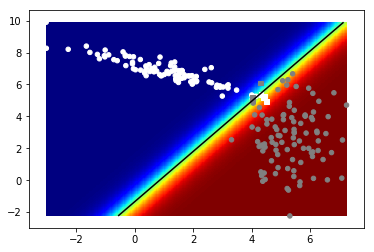

In [4]:
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X, Y_ = data.sample_gauss(2, 100)
Yoh_ = data.class_to_onehot(Y_)

# izgradi graf:
tflr = TFLogreg(X.shape[1], Yoh_.shape[1], 0.5)

# nauči parametre:
tflr.train(X, Yoh_, 2000)

# dohvati vjerojatnosti na skupu za učenje
probs = tflr.eval(X)
Y = probs.argmax(axis=1)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, recall, precision = data.eval_perf_multi(Y, Y_)
print("Accuracy: {}".format(accuracy))
print("Preciznost: \n{}".format(precision))
print("Odziv: \n{}".format(recall))

# iscrtaj rezultate, decizijsku plohu
decfun = lambda x: tflr.eval(x)[:,0]
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y, special=[])
plt.show()

#### 4. Zadatak - Konfigurabilni duboki modeli u Tensorflowu

W_01:0 (2, 10)
b_1:0 (10,)
W_12:0 (10, 10)
b_2:0 (10,)
W_23:0 (10, 2)
b_3:0 (2,)
Total count:  162
Iter 0 => loss: 5.159278392791748
Iter 1000 => loss: 0.3180376887321472
Iter 2000 => loss: 0.17709465324878693
Iter 3000 => loss: 0.1637706160545349
Iter 4000 => loss: 0.11312273889780045
Iter 5000 => loss: 0.0644921064376831
Iter 6000 => loss: 0.05684676393866539
Iter 7000 => loss: 0.04676423221826553
Iter 8000 => loss: 0.044331733137369156
Iter 9000 => loss: 0.04293293505907059
W_01:0 (2, 10)
b_1:0 (10,)
W_12:0 (10, 10)
b_2:0 (10,)
W_23:0 (10, 2)
b_3:0 (2,)
Total count:  162
(0.98333333333333328, [(1.0, 0.967741935483871), (0.96666666666666667, 1.0)], array([[30,  0],
       [ 1, 29]]))


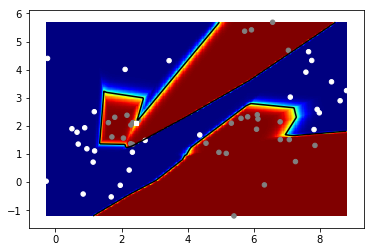

In [2]:
np.random.seed(100)
tf.set_random_seed(100)

# instanciraj podatke X i labele Yoh_
X, Y_ = data.sample_gmm(6, 2, 10)
# X, Y_ = data.sample_gauss(3, 100)
Yoh_ = data.class_to_onehot(Y_)

layers = [X.shape[1], 10, 10, Yoh_.shape[1]]
model = TFDeep(layers, activation=tf.nn.relu)
model.count_params()
model.train(X, Yoh_, 10000)
model.count_params()

# dohvati vjerojatnosti na skupu za učenje
Y = model.eval(X).argmax(axis=1)

# ispiši performansu (preciznost i odziv po razredima)
print(data.eval_perf_multi(Y, Y_))

# iscrtaj rezultate, decizijsku plohu
decfun = lambda x: model.eval(x)[:,0]
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y, special=[])
plt.show()

#### 5. Zadatak - Usporedba s jezgrenim SVM-om

Accuracy: 0.9333333333333333
Preciznost: 1.0
Odziv: 0.8666666666666667


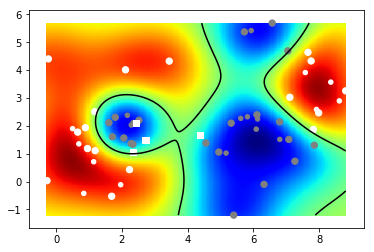

In [3]:
np.random.seed(100)
X, Y_ = data.sample_gmm(6, 2, 10)
svm = KSVMWrap(X, Y_)
Y = svm.predict(X)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
print("Accuracy: {}".format(accuracy))
print("Preciznost: {}".format(precision))
print("Odziv: {}".format(recall))

# iscrtaj rezultate, decizijsku plohu
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(svm.get_scores, bbox, offset=0)
data.graph_data(X, Y_, Y, special=svm.support())
plt.show()